### Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en  
### Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

### 1- (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos

In [1]:
import numpy as np
import cv2 as cv

#funcion para single template
def get_single_match(img, method):
    # Leer el template y la imagen
    template = cv.imread('./template/pattern.png')
    template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    template = cv.Canny(template, 50, 100)    # Postprocesamiento parapara detección de bordes con Canny
    score = None

    x_init, y_init, x_final, y_final = 0, 0, 0, 0
    list_factor = np.linspace(0.01, 3, 60)    # iteracion de la imagen sobre distintos factores
    for factor in list_factor: 
        resize_img_gray = cv.resize(img_gray, None, fx=factor, fy=factor) # Reescalar la imagen.  
        if  template.shape[0] < resize_img_gray.shape[0] and resize_img_gray.shape[1] > template.shape[1]:  # imagen debe ser mas grande que el template
            threshold2, _ = cv.threshold(resize_img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)  # Imagen binarizada (embebida - Otsu) - Parámetros: Imag_original,umbral,valor_máximo,método
            resize_img_gray = cv.Canny(resize_img_gray, 0.5*threshold2, threshold2) # Postprocesamiento con Canny a imagen redimensionada
            result = cv.matchTemplate(resize_img_gray, template, method)
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

            if (score is None or min_val < score) and (method == cv.TM_SQDIFF or method == cv.TM_SQDIFF_NORMED):  #deependiendo el metodo se asignan maximos y minimos,score y ubicacion se guarda y es mejor al previo
                score = min_val
                x_init = int(min_loc[0] / factor)
                y_init = int(max_loc[1] / factor)
                x_final= int((max_loc[0] + template.shape[1]) / factor)
                y_final= int((min_loc[1] + template.shape[0]) / factor)
            elif score is None or max_val > score:
                score = max_val
                x_init = int(max_loc[0] / factor)
                y_init = int(max_loc[1] / factor)
                x_final= int((max_loc[0] + template.shape[1]) / factor)
                y_final= int((max_loc[1] + template.shape[0]) / factor)

    cv.rectangle(img_rgb,(x_init, y_init),(x_final, y_final),(0, 0, 255),2)
    
    return img_rgb, score

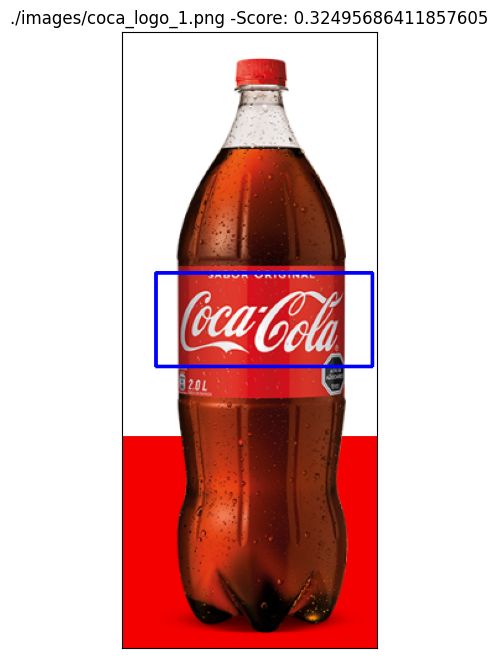

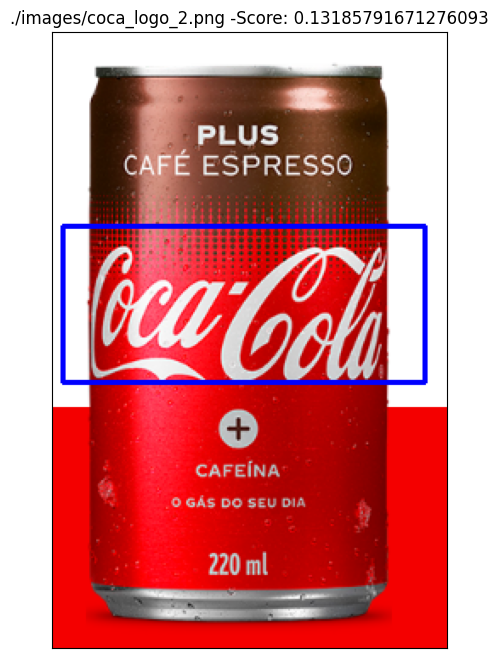

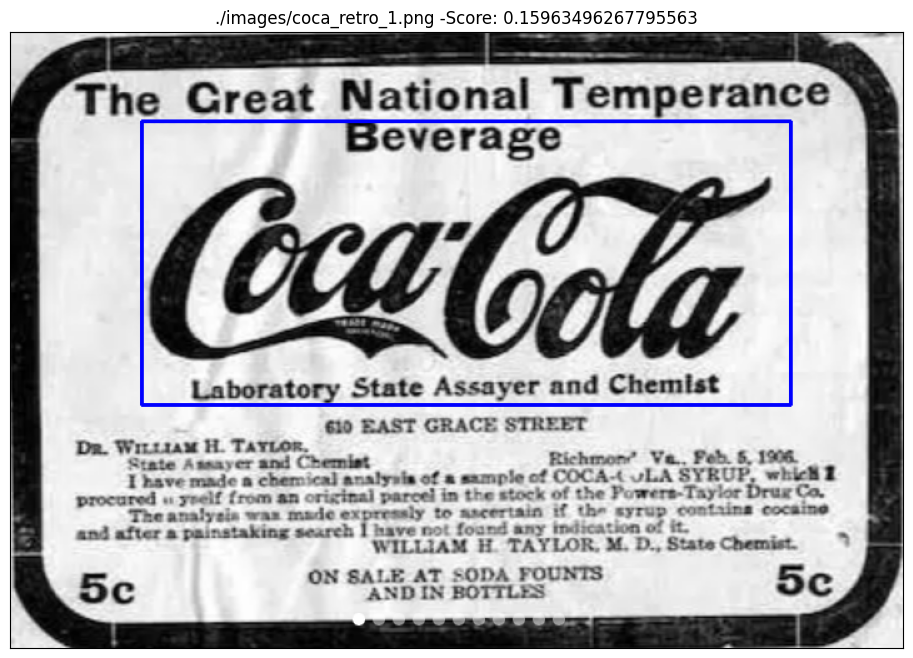

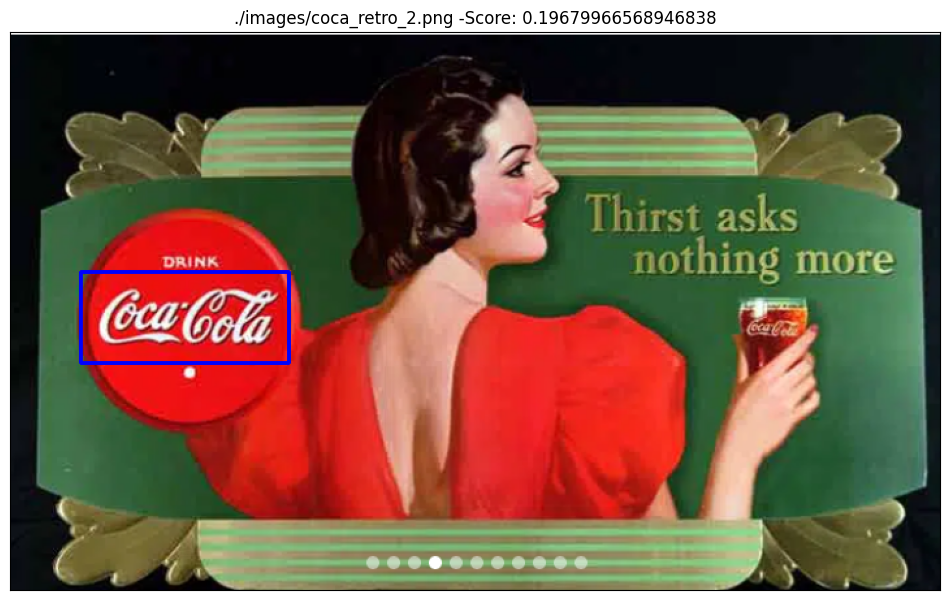

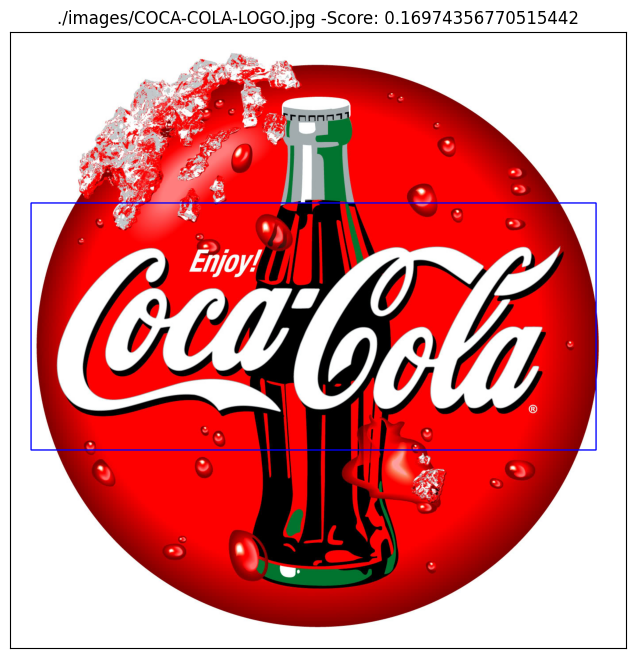

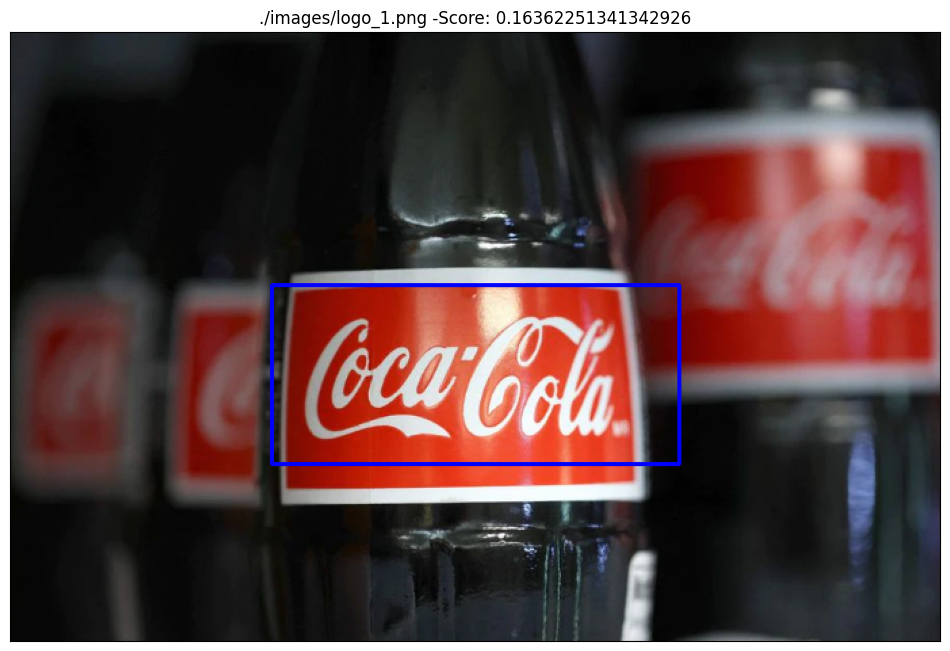

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt

list_img = ['coca_logo_1.png','coca_logo_2.png','coca_retro_1.png','coca_retro_2.png','COCA-COLA-LOGO.jpg','logo_1.png']
for var in range(len(list_img)):
    path_img='./images/' + list_img[var]
    img1 = cv.imread(path_img)
    result_img, score = get_single_match(img1, cv.TM_CCORR_NORMED)
    plt.figure(figsize=(12, 8))
    plt.imshow(result_img)
    plt.title(f'{path_img} -Score: {score}'),plt.xticks([]), plt.yticks([])
    plt.show()